# 車牌辨識系統
## 三、英文字母與數字手寫分類器
<img src="https://raw.githubusercontent.com/j82887/Artificial-Intelligence/master/00_Image/19_Implementation%20-%2004_Car_License_Plate.png" align="left" width="200">

In [140]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

# 讀取數字手寫
(x_train_mnist, y_train_minst),(x_test_mnist, y_test_minst) = mnist.load_data() 

# 標籤名稱
mnist_label_name = [i for i in range(10)]
print("標籤名稱：",mnist_label_name)

# 打印維度
#print("訓練集數字手寫的類別數量:%s" %Counter(y_train_minst))
print("訓練集數字手寫的維度:",x_train_mnist.shape)
#print("測試集數字手寫的類別數量:%s" %Counter(y_test_minst))
print("測試集數字手寫的維度:",x_test_mnist.shape)

標籤名稱： [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
訓練集數字手寫的維度: (60000, 28, 28)
測試集數字手寫的維度: (10000, 28, 28)


In [141]:
# 讀取AZ_excel
AZdata = pd.read_csv('A_Z Handwritten Data.csv', header = None)
print("英文手寫維度：",AZdata.shape)

# 建立標籤名稱
AZ_label_name = [chr(i+65) for i in range(26)]
print("標籤名稱：",AZ_label_name)

# 將影像（特徵）與提取為陣列
AZ_label = np.array(AZdata)[:,0]
AZ_feature = np.array(AZdata)[:,1:785]
AZ_feature = AZ_feature.reshape(len(AZdata),28,28)

#print("英文手寫的類別數量:%s" %Counter(AZ_label))
print("英文手寫的維度:",AZ_feature.shape)

# 分割為訓練集與測試集
x_train_AZ, x_test_AZ, y_train_AZ, y_test_AZ = train_test_split(AZ_feature, AZ_label, random_state = 0, test_size = 0.4)


#print("訓練集英文手寫的類別數量:%s" %Counter(y_train_AZ))
print("訓練集英文手寫的維度:",x_train_AZ.shape)
#print("測試集英文手寫的類別數量:%s" %Counter(y_test_AZ))
print("測試集英文手寫的維度:",x_test_AZ.shape)

英文手寫維度： (372451, 785)
標籤名稱： ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
英文手寫的維度: (372451, 28, 28)
訓練集英文手寫的維度: (223470, 28, 28)
測試集英文手寫的維度: (148981, 28, 28)


## 兩個資料集合併
1. 訓練集與測試集
2. 特徵、標籤與標籤名稱

In [142]:
# 特徵合併
x_train = np.vstack([x_train_mnist, x_train_AZ])
x_test = np.vstack([x_test_mnist, x_test_AZ])

# 標籤合併
y_train = np.hstack([y_train_minst, y_train_AZ+10])
y_test = np.hstack([y_test_minst, y_test_AZ+10])

# 標籤名稱
label_name = np.hstack([mnist_label_name, AZ_label_name])
print(label_name)

# One_hot_Encoding
no_one_hot_y_train = y_train
no_one_hot_y_test = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 正規化、轉變型態與改變維度
x_train = np.expand_dims(x_train.astype('float32')/255,-1)
x_test = np.expand_dims(x_test.astype('float32')/255,-1)
print(x_train.shape)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
(283470, 28, 28, 1)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same', input_shape=(28,28,1)))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dropout(0.25))

cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.25))

cnn.add(Dense(36, activation='softmax'))

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [61]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [62]:
history = cnn.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_split= 0.1)

Epoch 1/20
1994/1994 [==============================] - 165s 83ms/step - loss: 0.2415 - acc: 0.9289 - val_loss: 0.1053 - val_acc: 0.9808
Epoch 2/20
1994/1994 [==============================] - 169s 85ms/step - loss: 0.1154 - acc: 0.9652 - val_loss: 0.0778 - val_acc: 0.9845
Epoch 3/20
1994/1994 [==============================] - 169s 85ms/step - loss: 0.0939 - acc: 0.9708 - val_loss: 0.0769 - val_acc: 0.9855
Epoch 4/20
1994/1994 [==============================] - 169s 85ms/step - loss: 0.0797 - acc: 0.9751 - val_loss: 0.0689 - val_acc: 0.9864
Epoch 5/20
1994/1994 [==============================] - 170s 85ms/step - loss: 0.0703 - acc: 0.9776 - val_loss: 0.0607 - val_acc: 0.9861
Epoch 6/20
1994/1994 [==============================] - 170s 85ms/step - loss: 0.0628 - acc: 0.9799 - val_loss: 0.0529 - val_acc: 0.9898
Epoch 7/20
1994/1994 [==============================] - 170s 85ms/step - loss: 0.0564 - acc: 0.9814 - val_loss: 0.0446 - val_acc: 0.9901
Epoch 8/20
1994/1994 [===================

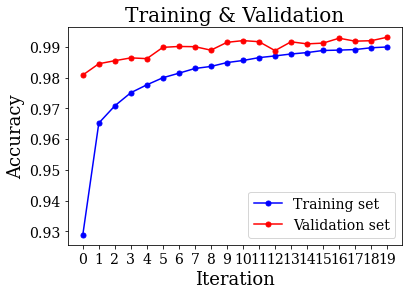

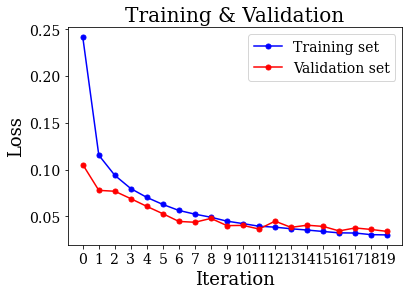

In [66]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.rcParams["font.family"] = "serif"
plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_acc)), val_acc,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right',fontsize=14)
plt.show()

plt.title("Training & Validation", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.plot(np.arange(len(loss)), loss,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(val_loss)), val_loss,color='r', label="Validation set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20,endpoint=True),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=14)
plt.show()

In [68]:
train_loss, train_acc = cnn.evaluate(x_train, y_train)
print("訓練集的準確度為：%0.4f" %(train_acc))
print("訓練集的損失值為：%0.4f" %(train_loss))

8859/8859 [==============================] - 43s 5ms/step - loss: 0.0151 - acc: 0.9955
訓練集的準確度為：0.9955
訓練集的損失值為：0.0151


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

predict = cnn.predict(x_train)
predictions = [np.argmax(one_hot)for one_hot in predict]

Text(0.5, 1.0, 'Accuracy: 0.9955')

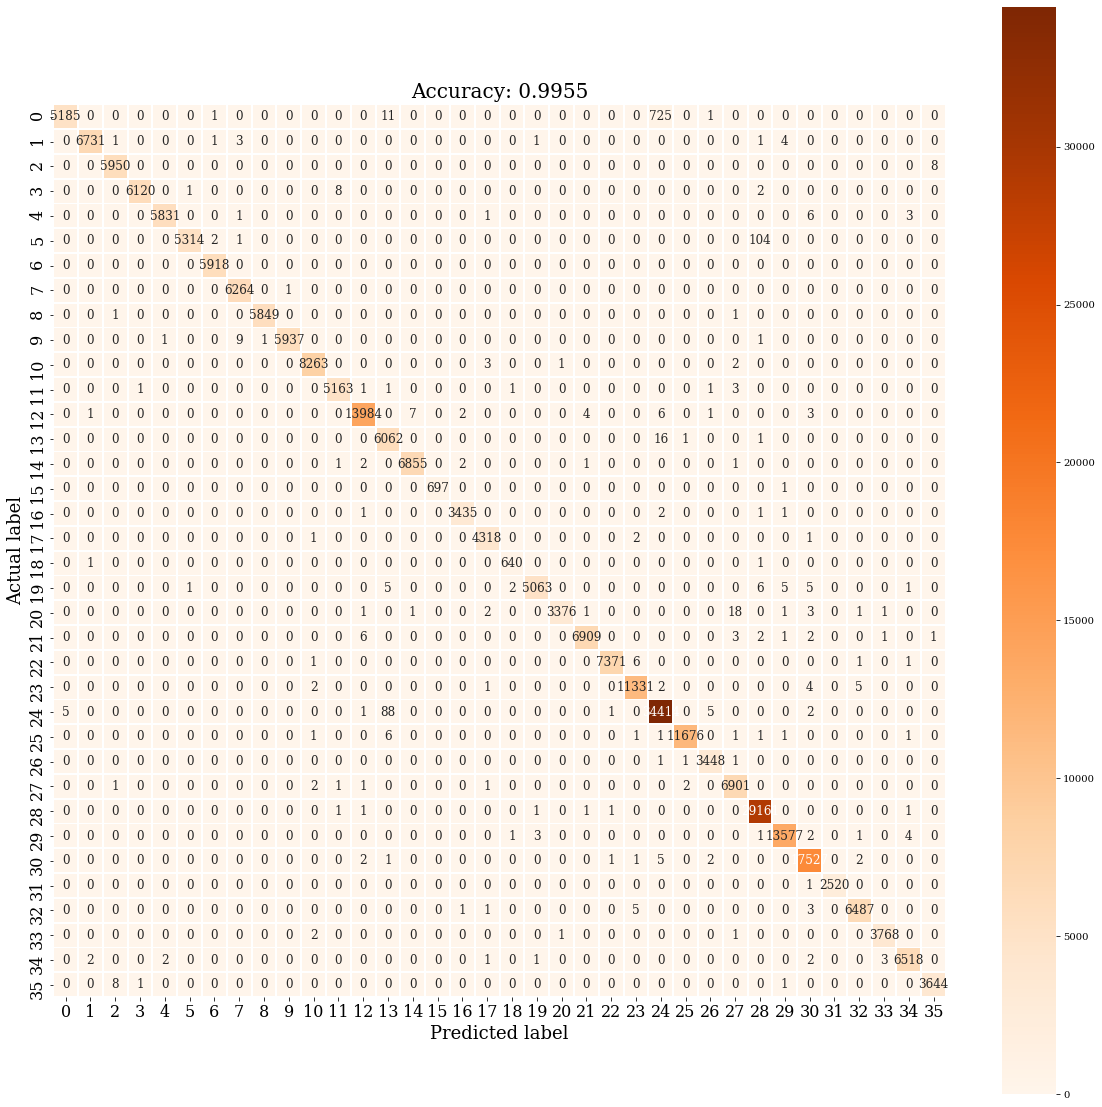

In [73]:
cm = confusion_matrix(no_one_hot_y_train, predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Oranges',annot_kws={"size": 12})
plt.ylabel('Actual label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accuracy: %0.4f' %(train_acc), size = 20)

In [145]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print("訓練集的準確度為：%0.4f" %(test_acc))
print("訓練集的損失值為：%0.4f" %(test_loss))

4969/4969 [==============================] - 25s 5ms/step - loss: 0.0360 - acc: 0.9910
訓練集的準確度為：0.9910
訓練集的損失值為：0.0360


In [143]:
predict = cnn.predict(x_test)
predictions = [np.argmax(one_hot)for one_hot in predict]

Text(0.5, 1.0, 'Accuracy: 0.9910')

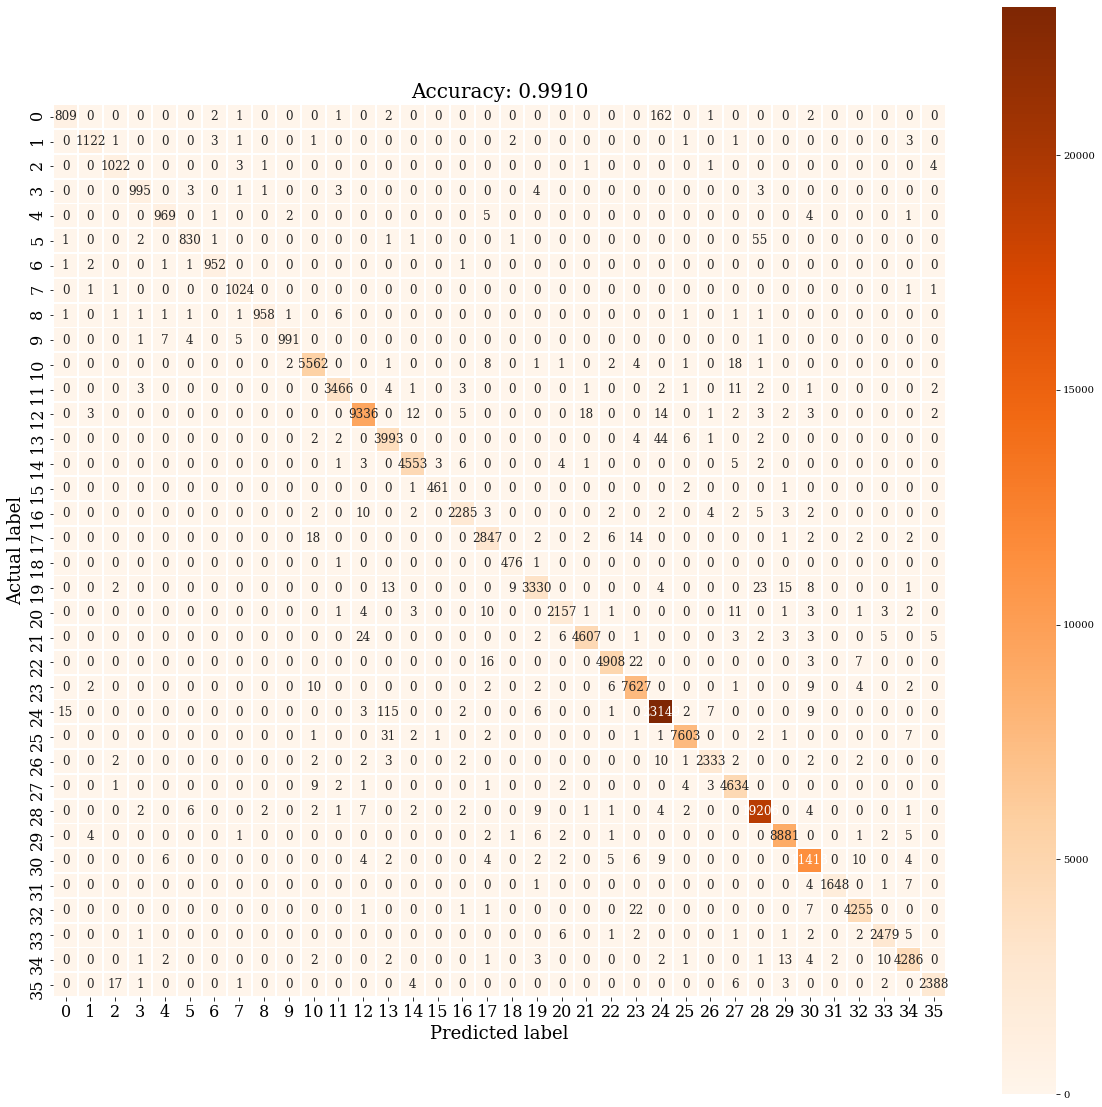

In [146]:
cm = confusion_matrix(no_one_hot_y_test, predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Oranges',annot_kws={"size": 12})
plt.ylabel('Actual label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accuracy: %0.4f' %(test_acc), size = 20)

In [74]:
from keras.models import load_model

cnn.save('cnn_model.h5')

from tensorflow.keras.models import load_model

cnn = load_model('cnn_model.h5')